<a href="https://colab.research.google.com/github/SingManjot/YOLOv8-DeepSORT-Object-Tracking-and-Counting/blob/main/yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initializing

In [1]:
from IPython.display import Image

In [2]:
!git clone https://github.com/SingManjot/YOLOv8-DeepSORT-Object-Tracking-and-Counting

Cloning into 'YOLOv8-DeepSORT-Object-Tracking-and-Counting'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 154 (delta 44), reused 114 (delta 20), pack-reused 0
Receiving objects: 100% (154/154), 33.20 MiB | 30.13 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [3]:
%cd /content/YOLOv8-DeepSORT-Object-Tracking-and-Counting

/content/YOLOv8-DeepSORT-Object-Tracking-and-Counting


In [4]:
!pip install -e '.[dev]'

Obtaining file:///content/YOLOv8-DeepSORT-Object-Tracking-and-Counting
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.7/228.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
%cd /content/YOLOv8-DeepSORT-Object-Tracking-and-Counting/ultralytics/yolo/v8/detect

/content/YOLOv8-DeepSORT-Object-Tracking-and-Counting/ultralytics/yolo/v8/detect


#Downloading dataset from roboflow (required for training)
NOTE: In case you have an already annotated dataset, you can upload the entire folder onto roboflow and generate a api-key that can be used to directly import the dataset onto google colab

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="your-api-key")
project = rf.workspace("test-wem2n").project("vehicles")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=983472403affe0f696aea104aeadbb420413aab11c30e1ceaa97d70cd820229f
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall: idna
    Found e

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.


Extracting Dataset Version Zip to Vehicles-India-1 in yolov8:: 100%|██████████| 1730/1730 [00:00<00:00, 2476.05it/s]


#Downloading and unzipping DeepSORT Files

In [7]:
!gdown "https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t
To: /content/YOLOv8-DeepSORT-Object-Tracking-and-Counting/ultralytics/yolo/v8/detect/deep_sort_pytorch.zip
100% 43.1M/43.1M [00:00<00:00, 221MB/s]


In [8]:
!unzip 'deep_sort_pytorch.zip'

Archive:  deep_sort_pytorch.zip
  inflating: deep_sort_pytorch/.gitignore  
   creating: deep_sort_pytorch/configs/
  inflating: deep_sort_pytorch/configs/deep_sort.yaml  
   creating: deep_sort_pytorch/deep_sort/
  inflating: deep_sort_pytorch/deep_sort/__init__.py  
   creating: deep_sort_pytorch/deep_sort/__pycache__/
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-38.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-38.pyc  
   creating: deep_sort_pytorch/deep_sort/deep/
 extracting: deep_sort_pytorch/deep_sort/deep/__init__.py  
   creating: deep_sort_pytorch/deep_sort/deep/__pycache__/
  inflating: deep_sort_pytorch/d

# Training


In [9]:
HOME = '/content/YOLOv8-DeepSORT-Object-Tracking-and-Counting/ultralytics/yolo/v8/detect'

In [10]:
%cd {HOME}

/content/YOLOv8-DeepSORT-Object-Tracking-and-Counting/ultralytics/yolo/v8/detect


In [11]:
%cd {dataset.location}

/content/YOLOv8-DeepSORT-Object-Tracking-and-Counting/ultralytics/yolo/v8/detect/Vehicles-India-1


* Mounting to google drive, this is done to access the sample video.



In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


You may increase the number of epochs to anywhere between 100-200 depending on your needs

In [13]:
%cd {HOME}

!python train.py model=yolov8l.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

/content/YOLOv8-DeepSORT-Object-Tracking-and-Counting/ultralytics/yolo/v8/detect
100% 83.7M/83.7M [00:01<00:00, 65.9MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/YOLOv8-DeepSORT-Object-Tracking-and-Counting/ultralytics/yolo/v8/detect/Vehicles-India-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript

NOTE: If you wish to use the above trained model, while running the driver program, you may either replace the model in the command with the path to this model or copy the model to the subfolder /content/YOLOv8-DeepSORT-Object-Tracking-and-Counting/ultralytics/yolo/v8/detect.
Also don't forget to save the trained model for future reference.

#Validate the training

In [15]:
!ls /content/YOLOv8-DeepSORT-Object-Tracking-and-Counting/runs/detect/train

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch380.jpg
events.out.tfevents.1690348247.35a349d49ae2.4319.0  train_batch381.jpg
F1_curve.png					    train_batch382.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
predictions.json				    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    val_batch2_labels.jpg
results.png					    val_batch2_pred.jpg
train_batch0.jpg				    weights
train_batch1.jpg


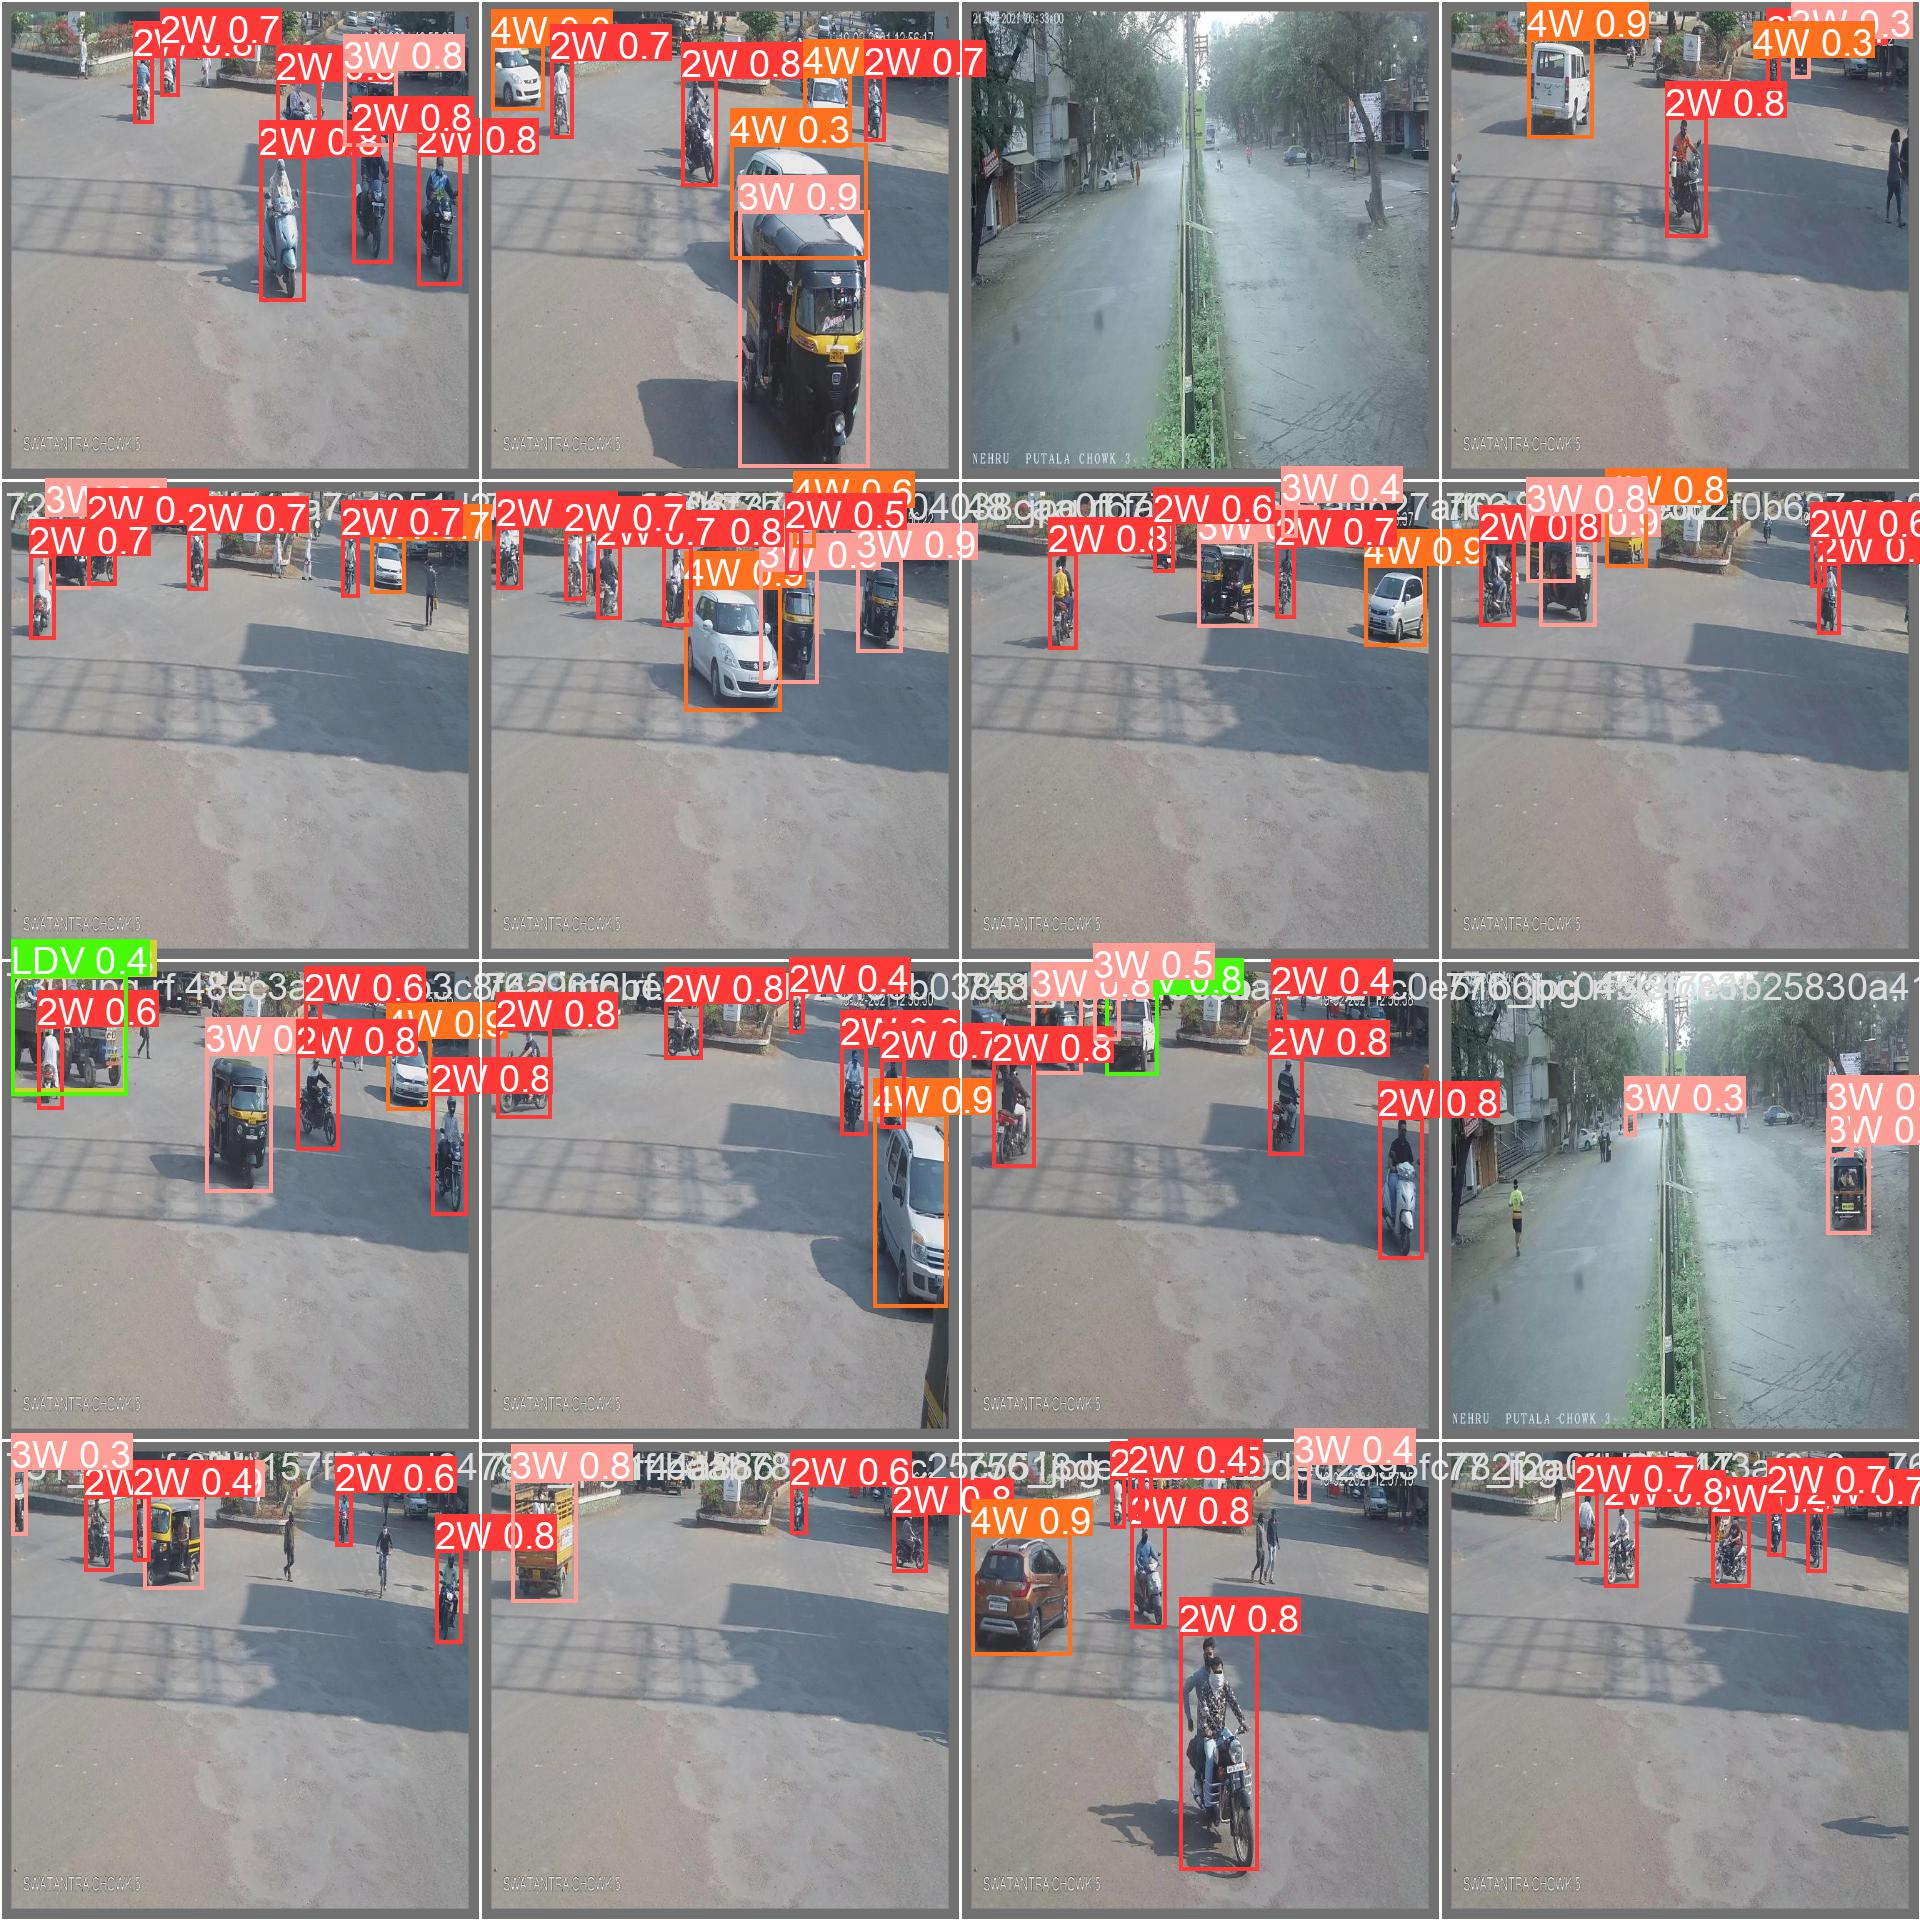

In [16]:
Image(filename = r'/content/YOLOv8-DeepSORT-Object-Tracking-and-Counting/runs/detect/train/val_batch2_pred.jpg', width =600)

In [17]:
!python val.py model='/content/YOLOv8-DeepSORT-Object-Tracking-and-Counting/runs/detect/train/weights/best.pt' data={dataset.location}/data.yaml

2023-07-26 05:29:34.620996: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-26 05:29:35.741176: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 268 layers, 43611234 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/YOLOv8-DeepSORT-Object-Tracking-and-Counting/ultralytics/yolo/v8/detect/Vehicles-India-1/valid/labels.cache... 170 images, 20 backgrounds, 0 corrupt: 100% 170/170 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:13<00:00,  1.22s/it]
                   all        170        812      0.692   

#Prediction


* The model that I am using is a pre-trained model for vehicle classification and detection. The link for the same is provided in the GitHub repo.

* The output video can be found in /content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train. NOTE: the latest train folder will contain the output file.

In [18]:
%cd {HOME}

/content/YOLOv8-DeepSORT-Object-Tracking-and-Counting/ultralytics/yolo/v8/detect


The command below is to download the pretrained model. If you wish to use your own model or the model that we trained in the previous step, you may choose to skip this step.

In [20]:
!gdown https://drive.google.com/uc?id=1SIqT3Y7vOQyJ6aiUYd-dpLjrgvYUV0LK


Downloading...
From: https://drive.google.com/uc?id=1SIqT3Y7vOQyJ6aiUYd-dpLjrgvYUV0LK
To: /content/YOLOv8-DeepSORT-Object-Tracking-and-Counting/ultralytics/yolo/v8/detect/best.pt
100% 87.7M/87.7M [00:01<00:00, 67.6MB/s]


Below is the command to run the Object Tracking and Counting. I am using google drive to access the video. You can either access the video directly from your google drive or choose to download it. Either way, make sure to place the video in the subfolder /content/YOLOv8-DeepSORT-Object-Tracking-and-Counting/ultralytics/yolo/v8/detect OR paste the correct path of the video in the command below

In [21]:
!python predict.py model='best.pt' source='/content/drive/MyDrive/Data/DATASET/sam_3min.mp4'

[2023-07-26 05:37:05,313][root.tracker][INFO] - Loading weights from deep_sort_pytorch/deep_sort/deep/checkpoint/ckpt.t7... Done!
2023-07-26 05:37:05.773674: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-26 05:37:07.254257: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 268 layers, 43611234 parameters, 0 gradients, 164.8 GFLOPs
video 1/1 (1/4350) /content/drive/MyDrive/Data/DATASET/sam_3min.mp4: 384x640 3 2Ws, 1 3W, 1 BUS, 95.4ms
video 1/1 (2/4350) /content/drive/MyDrive/Data/DATASET/sam_3min.mp4: 384x640 3 2Ws, 1 3W, 1 BUS, 40.8ms
video 1/1 (3/4350) /content/drive/MyDrive/Data/DA

The output video along with the csv file gets saved in the above specified location.
Usually the location is /content/YOLOv8-DeepSORT-Object-Tracking-and-Counting/runs/detect/train, but may vary depending on how many times you have predicted and if you have trained your model. In that case, check the latest train folder in this location /content/YOLOv8-DeepSORT-Object-Tracking-and-Counting/runs/detect.